# Sensorless Drive Diagnosis Project

#### Purpose of the project
To build a multi-class classification model with numerical attributes

#### About the dataset
Dataset used in the analysis: Sensorless Drive Diagnosis dataset (SDD): 

https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis 

The dataset contains information collected from electric current drive signals of a synchronous electric motor. The current signals are measured with a current probe and an oscilloscope on two phases.

After the advances in industrial information technology, condition monitoring methods are becoming increasingly important. The phase currents are used at the evaluation of the process data without additional, cost-intensive sensors and the determination the damage status of a syn-characterize chronomotors and the connected components. 

There are 48 continous predictive features. The target feature contains 11 classes. 


### Setup

In [48]:
import pandas as pd
import numpy as np

# plot pretty figures
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [49]:
np.random.seed(42)
import sys
import os

### Load Dataset

In [50]:
df = pd.read_csv("sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)
header_names = ['feat' + str(i) for i in range(df.shape[1]-1)]
header_names.append('class')
df.set_axis(header_names, axis=1, inplace=True)
display(df.head())
display(df.tail())
display(df.describe())

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
58504,-0.000010,0.000002,-0.000021,0.000021,-0.000006,-0.000098,-0.083417,-0.083419,-0.083398,-0.18234,...,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.4933,-1.4933,11
58505,-0.000011,0.000020,0.000031,-0.000018,-0.000106,0.000292,-0.085131,-0.085151,-0.085182,-0.18432,...,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.4925,-1.4926,11
58506,-0.000006,0.000019,-0.000102,-0.000003,0.000004,0.000117,-0.081989,-0.082008,-0.081906,-0.18614,...,-0.51103,20.9250,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.4912,-1.4910,11
58507,-0.000004,0.000034,-0.000442,0.000005,0.000007,0.000087,-0.081500,-0.081534,-0.081093,-0.18363,...,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.4932,-1.4931,11
58508,-0.000009,0.000052,0.000072,0.000010,0.000004,-0.000032,-0.083034,-0.083086,-0.083159,-0.18589,...,-0.50974,1.6026,4.5773,-1.5039,-1.5040,-1.5036,-1.4945,-1.4946,-1.4943,11


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat39,feat40,feat41,feat42,feat43,feat44,feat45,feat46,feat47,class
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686,6.000000
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175,3.162305
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


### Basic EDA

#### Checking Missing Values

There are not any misssing values. 

In [51]:
df.isna().sum().sum()

0

#### Checking the basic info

48non-null float(features), 1 non-null integer(target)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
feat0     58509 non-null float64
feat1     58509 non-null float64
feat2     58509 non-null float64
feat3     58509 non-null float64
feat4     58509 non-null float64
feat5     58509 non-null float64
feat6     58509 non-null float64
feat7     58509 non-null float64
feat8     58509 non-null float64
feat9     58509 non-null float64
feat10    58509 non-null float64
feat11    58509 non-null float64
feat12    58509 non-null float64
feat13    58509 non-null float64
feat14    58509 non-null float64
feat15    58509 non-null float64
feat16    58509 non-null float64
feat17    58509 non-null float64
feat18    58509 non-null float64
feat19    58509 non-null float64
feat20    58509 non-null float64
feat21    58509 non-null float64
feat22    58509 non-null float64
feat23    58509 non-null float64
feat24    58509 non-null float64
feat25    58509 non-null float64
feat26    58509 non-null float64


#### Checking Class Imbalance

There is not a class imbalance issue. All the classes have the same number of samples. 

In [53]:
df.groupby('class').size()

class
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
dtype: int64

#### Seperating Target and Features

In [54]:
X = df.drop(['class'], axis=1)
y = df['class']

### Data Visualizations

#### Histograms

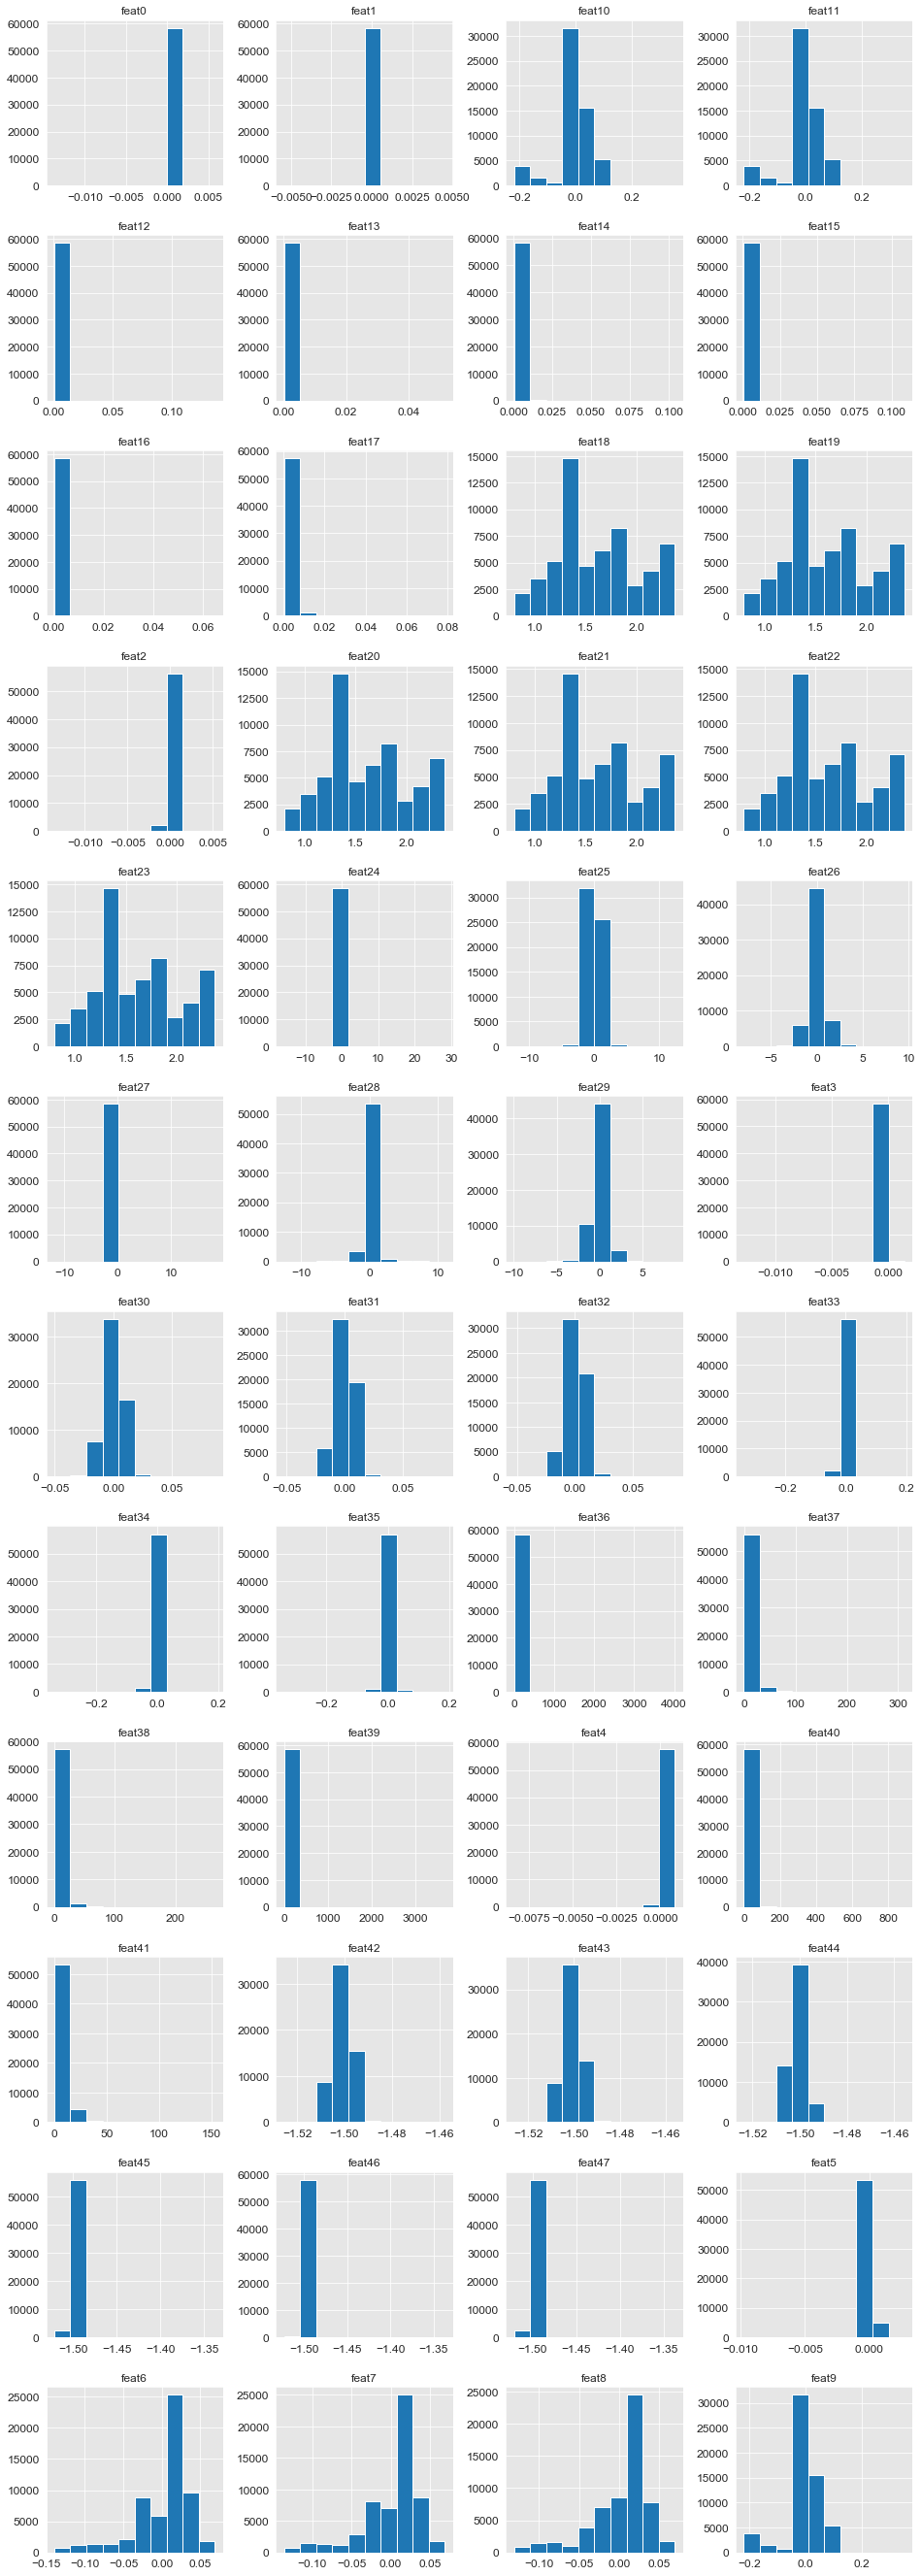

In [55]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 48
plt.rcParams["figure.figsize"] = fig_size
# plt.figure(figsize=(16,48))
X.hist(layout=(12,4))
plt.show()


#### Boxplots

##### Scaling Features To Get Better Boxplots 

In [59]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
# scaled_X = pd.DataFrame(scaled_x_train, columns=X_train.columns)

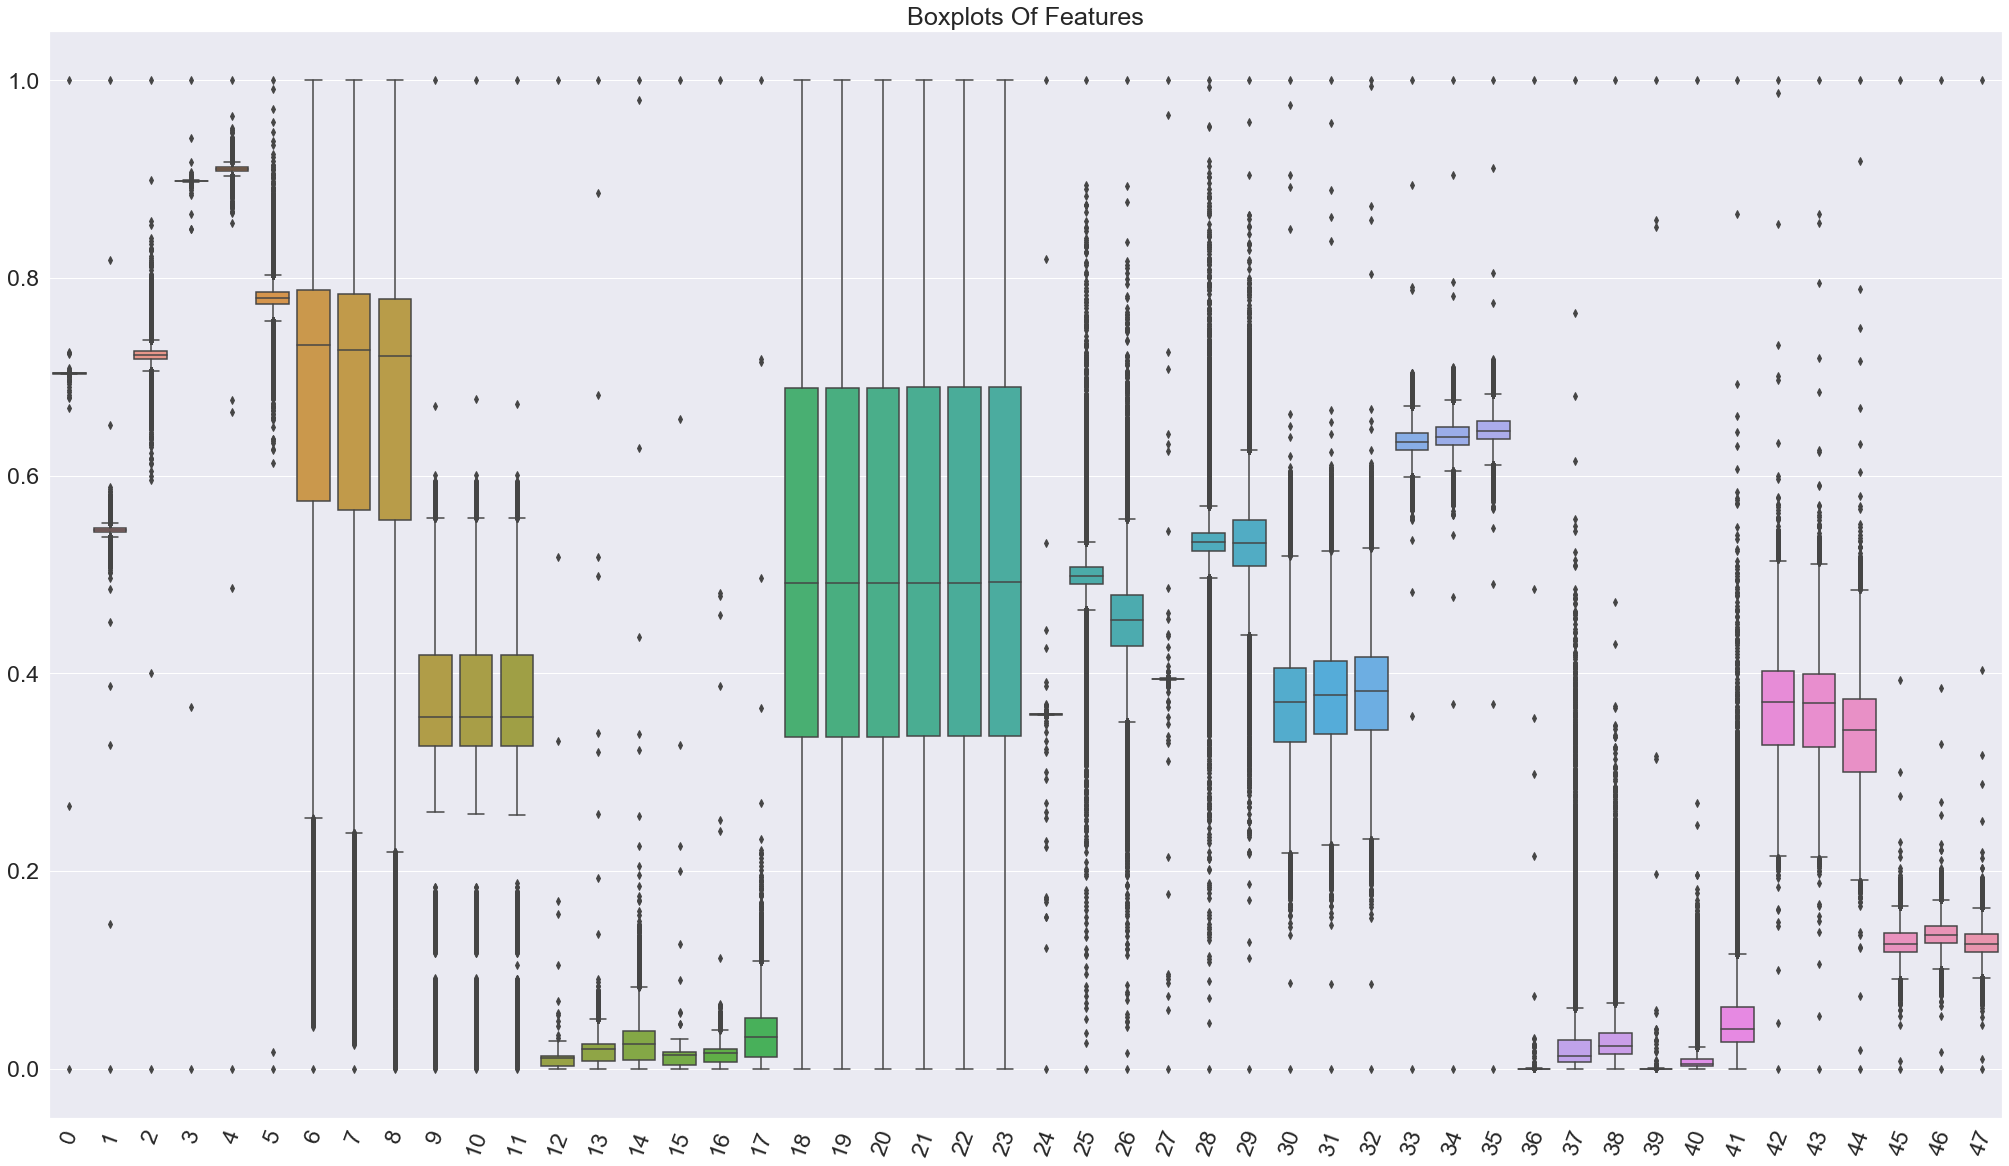

In [61]:
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1)  # Set font scale   
g = sns.boxplot(data=scaled_X)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('Boxplots Of Features');

In [ ]:
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1)  # Set font scale   
g = sns.violinplot(data=scaled_X)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('Violinplots Of Features');

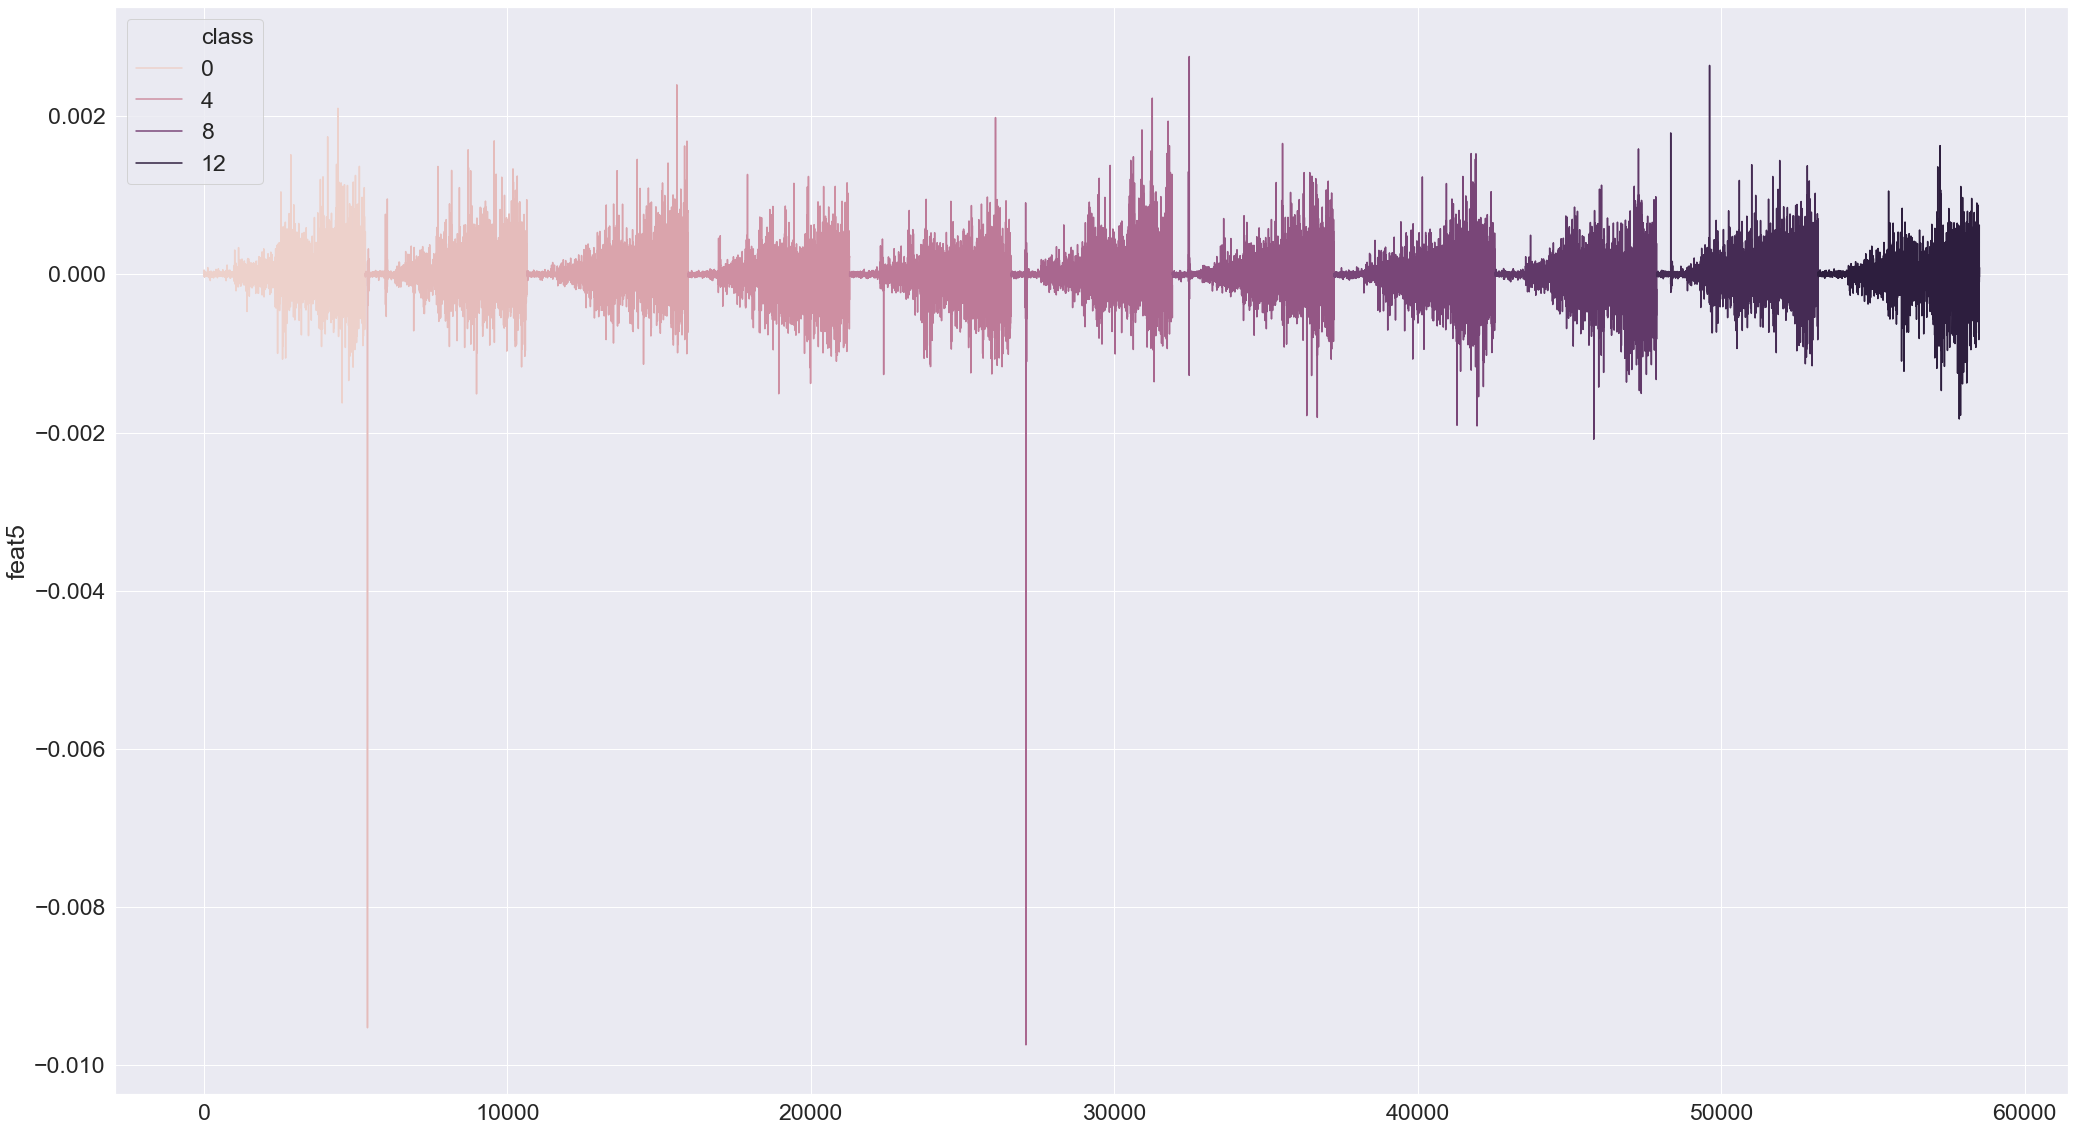

In [79]:
sns.lineplot(df.index, df['feat5'], hue=df['class'])

In [ ]:
sns.stripplot(df.index, df['feat5'], hue=df['class'])

In [ ]:
sns.stripplot(df['feat5'], hue=df['class'])

In [ ]:
sns.stripplot(hue=df['class'], df['feat5'])

In [ ]:
g = sns.PairGrid(data=df) 

In [ ]:
g = sns.PairGrid(data=df, hue = 'class') 

### Splitting The Data 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

#### Scaling Training Data

In [ ]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_x_train, columns=X_train.columns)

### Baseline Model: Logistic Regression

In [ ]:
log = LogisticRegression(solver='saga', max_iter=10000)
log.fit(scaled_X_train, y_train)
y_pred_train = log.predict(scaled_X_train)
y_pred_test = log.predict(scaled_X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

### Random Forest Classification Model

In [9]:
clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=42, n_estimators= 80)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [10]:
accuracy_score(y_train, y_pred_train)

1.0

In [11]:
round(accuracy_score(y_test, y_pred_test), 6)

0.999145

In [12]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4245
           2       1.00      1.00      1.00      4230
           3       1.00      1.00      1.00      4275
           4       1.00      1.00      1.00      4271
           5       1.00      1.00      1.00      4253
           6       1.00      1.00      1.00      4262
           7       1.00      1.00      1.00      4216
           8       1.00      1.00      1.00      4290
           9       1.00      1.00      1.00      4307
          10       1.00      1.00      1.00      4247
          11       1.00      1.00      1.00      4211

    accuracy                           1.00     46807
   macro avg       1.00      1.00      1.00     46807
weighted avg       1.00      1.00      1.00     46807



In [13]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1074
           2       1.00      1.00      1.00      1089
           3       1.00      1.00      1.00      1044
           4       1.00      1.00      1.00      1048
           5       1.00      1.00      1.00      1066
           6       1.00      1.00      1.00      1057
           7       1.00      1.00      1.00      1103
           8       1.00      1.00      1.00      1029
           9       1.00      1.00      1.00      1012
          10       1.00      1.00      1.00      1072
          11       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702



In [14]:
print(confusion_matrix(y_train, y_pred_train), '\n')
print(confusion_matrix(y_test, y_pred_test), '\n')

[[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4230    0    0    0    0    0    0    0    0    0]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4271    0    0    0    0    0    0    0]
 [   0    0    0    0 4253    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    0    0    0    0    0    0 4290    0    0    0]
 [   0    0    0    0    0    0    0    0 4307    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 

[[1073    0    0    0    0    1    0    0    0    0    0]
 [   0 1088    0    0    0    0    0    0    1    0    0]
 [   0    0 1044    0    0    0    0    0    0    0    0]
 [   0    0    0 1048    0    0    0    0    0    0    0]
 [   0    0    3    0 1062    0    0    1    0    0    0]
 [   0    0    0    0    0 1057    0    0    0    0    0]
 [   0    0

In [23]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20, 15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.title('Compariosn of Feature Importances')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

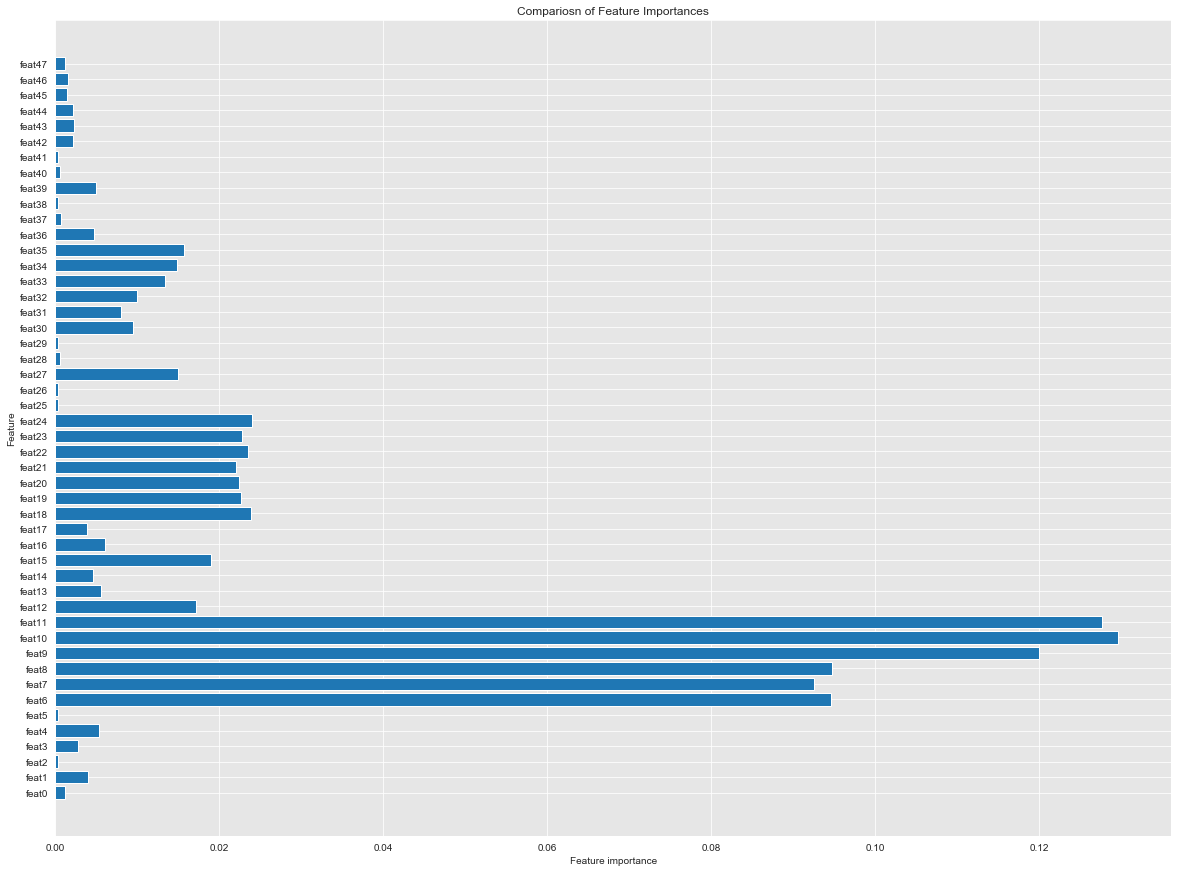

In [24]:
plot_feature_importances(clf)

In [30]:
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])

In [29]:
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[10, 20, 50, 100, 150, 200],
         'classifier__max_depth': [3, 4, 5, 6, 7],
         'classifier__min_samples_split': [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'classifier__class_weight':['balanced']}]

In [33]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [34]:
clf.cv_results_

{'mean_fit_time': array([ 0.19620581,  0.26161222,  0.53805957, ..., 38.35796342,
        56.78436604, 62.79856143]),
 'std_fit_time': array([1.13375156e-02, 9.72860302e-03, 5.39690436e-03, ...,
        1.83127721e-01, 4.58925672e-01, 5.92750375e+00]),
 'mean_score_time': array([0.02793446, 0.03707418, 0.07387428, ..., 0.21279416, 0.30821633,
        0.2726882 ]),
 'std_score_time': array([0.00213011, 0.00087017, 0.00190448, ..., 0.00273101, 0.01232159,
        0.02041079]),
 'param_classifier__class_weight': masked_array(data=['balanced', 'balanced', 'balanced', ..., 'balanced',
                    'balanced', 'balanced'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=obj

In [40]:
# clf.cv_results_.keys()
clf.best_score_

0.9755591983822667

In [41]:
clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 9,
 'classifier__n_estimators': 200}

In [ ]:
# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

In [ ]:
clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=42, n_estimators= 80)

### A new Grid Search with updated parameters

In [ ]:
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[100, 120, 150, 180, 200],
         'classifier__max_depth': [6, 8, 10, 12, 14],
         'classifier__min_samples_split': [6, 8, 10, 12],
         'classifier__min_samples_leaf': [4, 6, 8, 10]}]
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
training_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
cross_val_score(adaboost_clf, df, target, cv=5).mean()